#### Importing of all needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import random

#### Realisation of AntiDerivative Class

In [2]:
class AntiDerivativeNum:

    def __init__(self, function=None, numBlocks=2, left=None, right=None, method=None):
        self.SetFunction(function)
        self.SetNumBlocks(numBlocks)
        self._sigh = 1
        left, right, self._sigh = (right, left, self._sigh * -1) if left > right else (left, right, self._sigh)
        self._left = left
        self._right = right
        self.__SetMethod(method)
        self.__Check()

# Setters
    def SetLeft(self, left):
        self._left = left
        return self.__Check_border()
        
    def SetRight(self, right):
        self._right = right
        return self.__Check_border()
    
    def SetFunction(self, function):
        self._function = function
        
    def SetNumBlocks(self, numBlocks):
        self._numBlocks = numBlocks
        self.__SetAlpha()
        self.__SetDots()
        
# Getters
    def GetMethod(self):
        return self.__method
    
    def __SetMethod(self, method):
        self.__method = method
        
    def __SetAlpha(self):
        raise NotImplementedError('Method AntiDerivativeNum.__SetAlpha is pure virtual and private')
        
    def __SetDots(self):
        raise NotImplementedError('Method AntiDerivativeNum.__SetDots is pure virtual and private')
        
    def __Check(self):
        pass
    
    def __Check_border(self):
        self._left, self._right, self._sigh = (self._right, self._left, self._sigh * -1) \
        if self._left > self._right else (self._left, self._right, self._sigh)

    def __call__(self, x):
        self.SetRight(x)
        h = (self._right - self._left)/self._numBlocks
        return self._sigh*h*np.dot(self._alpha, self._function(self._left+h*self._dots))       

#### Subclasses

In [3]:
class AntiDerivativeNumRightRectangle(AntiDerivativeNum):

    def __init__(self, function=None, numBlocks=2, left=None, right=None):
        method='Right Rectangles'
        super().__init__(function, numBlocks, left, right, method)

    def _AntiDerivativeNum__SetAlpha(self):
        self._alpha = np.append([0.],np.ones(self._numBlocks, dtype=float))

    def _AntiDerivativeNum__SetDots(self):
        self._dots = np.arange(0., self._numBlocks+1., 1.)

In [4]:
class AntiDerivativeNumLeftRectangle(AntiDerivativeNum):

    def __init__(self, function=None, numBlocks=2, left=None, right=None):
        method='Left Rectangles'
        super().__init__(function, numBlocks, left, right, method)

    def _AntiDerivativeNum__SetAlpha(self):
        self._alpha = np.append(np.ones(self._numBlocks, dtype=float),[0.])

    def _AntiDerivativeNum__SetDots(self):
        self._dots = np.arange(0., self._numBlocks+1., 1.)

In [5]:
class AntiDerivativeNumMiddleRectangle(AntiDerivativeNum):

    def __init__(self, function=None, numBlocks=2, left=None, right=None):
        method='Middle Rectangles'
        super().__init__(function, numBlocks, left, right, method)

    def _AntiDerivativeNum__SetAlpha(self):
        self._alpha = np.append(np.ones(self._numBlocks, dtype=float),[0.])

    def _AntiDerivativeNum__SetDots(self):
        self._dots = np.arange(0., self._numBlocks+1., 1.) + 0.5

In [6]:
class AntiDerivativeNumTrapezoidal(AntiDerivativeNum):

    def __init__(self, function=None, numBlocks=2, left=None, right=None):
        method='Trapezoidal'
        super().__init__(function, numBlocks, left, right, method)

    def _AntiDerivativeNum__SetAlpha(self):
        self._alpha = np.append([0.5], np.append(np.ones(self._numBlocks-1, dtype=float),[0.5]))

    def _AntiDerivativeNum__SetDots(self):
        self._dots = np.arange(0., self._numBlocks+1., 1.)

In [7]:
class AntiDerivativeNumSimpsons(AntiDerivativeNum):

    def __init__(self, function=None, numBlocks=2, left=None, right=None):
        method='Simpsons'
        super().__init__(function, numBlocks, left, right, method)

    def _AntiDerivativeNum__Check(self):
        if self._numBlocks % 2:
            raise NotImplementedError('Class AntiDerivativeNumSimpsons can not be used with odd intervals')

    def _AntiDerivativeNum__SetAlpha(self):
        self._alpha = [1/3] + [1+(-1)**i/3 for i in np.arange(0,self._numBlocks-1, 1.)] + [1/3]

    def _AntiDerivativeNum__SetDots(self):
        self._dots = np.arange(0., self._numBlocks+1., 1.)

In [8]:
class AntiDerivativeNumMonteCarloSimple(AntiDerivativeNum):
    def __init__(self, function=None, numBlocks=2, left=None, right=None):
        method = 'MonteCarloSimple'
        super().__init__(function, numBlocks, left, right, method)
        
    def _AntiDerivativeNum__SetAlpha(self):
        pass

    def _AntiDerivativeNum__SetDots(self):
        pass
    
    def __call__(self, x):
        self.SetRight(x)
        answer = 0
        for i in range(self._numBlocks):
            x = random.uniform(self._left, self._right)
            answer += self._function(x)
        return (self._right - self._left)/self._numBlocks * answer

In [9]:
class AntiDerivativeNumMonteCarloGeom(AntiDerivativeNum):
    def __init__(self, function=None, numBlocks=2, left=None, right=None, ymin=0, ymax=0):
        method = 'MonteCarloGeom'
        super().__init__(function, numBlocks, left, right, method)
        self._xValues = []
        self._yValues = []
        self.SetYMIN(ymin)
        self.SetYMAX(ymax)
        self._answer = 0
        self._error = 1
        
    def _AntiDerivativeNum__SetAlpha(self):
        pass

    def _AntiDerivativeNum__SetDots(self):
        pass
    
    def SetYMIN(self, ymin):
        self._ymin = ymin
    
    def SetYMAX(self, ymax):
        self._ymax = ymax
    
    def SetFunction(self, function):
        self._function = function
        self.SetYMIN(0)
        self.SetYMAX(0)
    
    def Calculate(self):
        self._xValues = []
        self._yValues = []
        innerdots = 0
        self._error = 0
        for i in range(self._numBlocks):
            x, y = random.uniform(self._left, self._right), random.uniform(self._ymin, self._ymax)
            if self._function(x) > self._ymax:
                self.SetYMAX(self._function(x))
                self._error = 1
            if self._function(x) < self._ymin:
                self.SetYMIN(self._function(x))
                self._error = 1
            self._xValues.append(x)
            self._yValues.append(y)
            if 0 <= y and y < self._function(x):
                innerdots += 1
            if 0 > y and y > self._function(x):
                innerdots -= 1
        self._answer = innerdots/self._numBlocks * (self._ymax - self._ymin) * (self._right - self._left)
        return self._answer
        
    def __call__(self, xinit):
        super().SetRight(xinit)
        while self._error == 1:
            self._answer = self.Calculate()
        self._error = 1
        return self._answer

### Task solution

In [10]:
LEFT = 0
RIGHT = 2
xSym = smp.Symbol('x')
functionsSym = [smp.sin(xSym**2),
                smp.cos(smp.sin(xSym)),
                smp.exp(smp.cos(smp.sin(xSym))),
                smp.log(xSym + 3.),
                smp.sqrt(xSym + 3.)
               ]
ValueAnalyticalSym = [smp.integrate(fSym, (xSym, LEFT, RIGHT)) for fSym in functionsSym]
LambdaFunc = [smp.lambdify(xSym, fSym) for fSym in functionsSym]

In [11]:
F1 = AntiDerivativeNumRightRectangle(left=LEFT, right=RIGHT)
F2 = AntiDerivativeNumLeftRectangle(left=LEFT, right=RIGHT)
F3 = AntiDerivativeNumMiddleRectangle(left=LEFT, right=RIGHT)
F4 = AntiDerivativeNumTrapezoidal(left=LEFT, right=RIGHT)
F5 = AntiDerivativeNumSimpsons(left=LEFT, right=RIGHT)
F6 = AntiDerivativeNumMonteCarloSimple(left=LEFT, right=RIGHT)
F7 = AntiDerivativeNumMonteCarloGeom(left=LEFT, right=RIGHT)
Func = [F1, F2, F3, F4, F5, F6, F7]

#### Plots

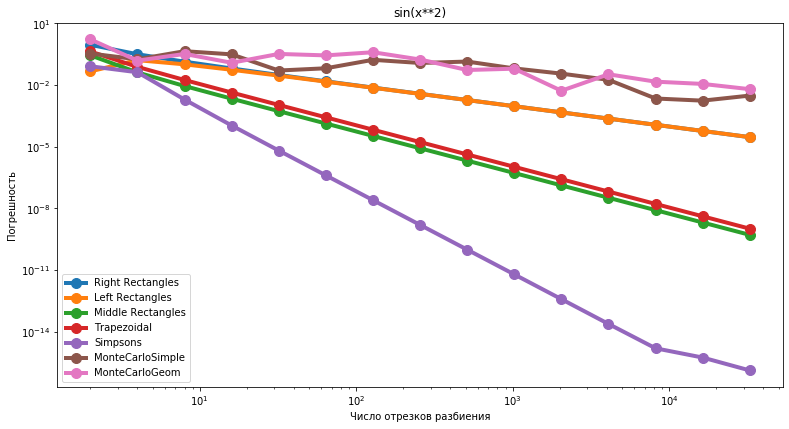

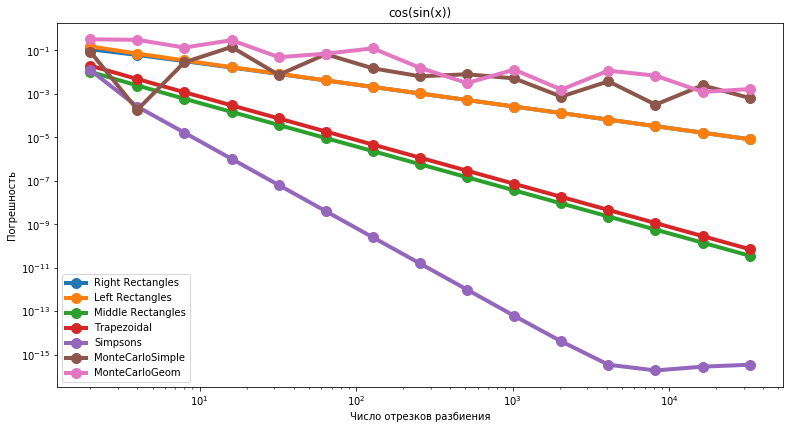

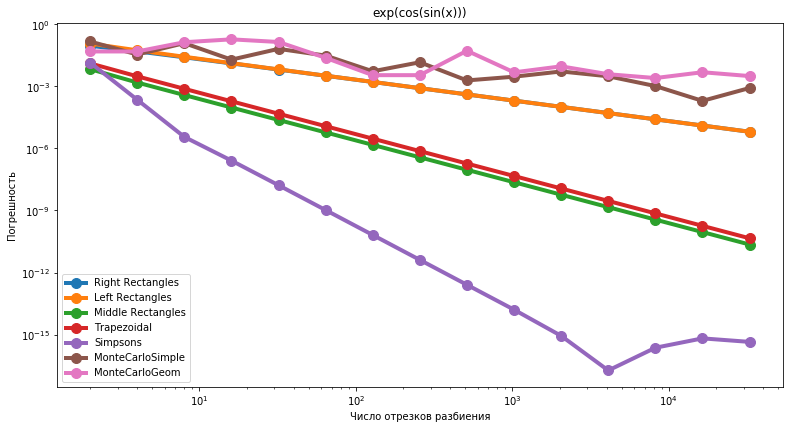

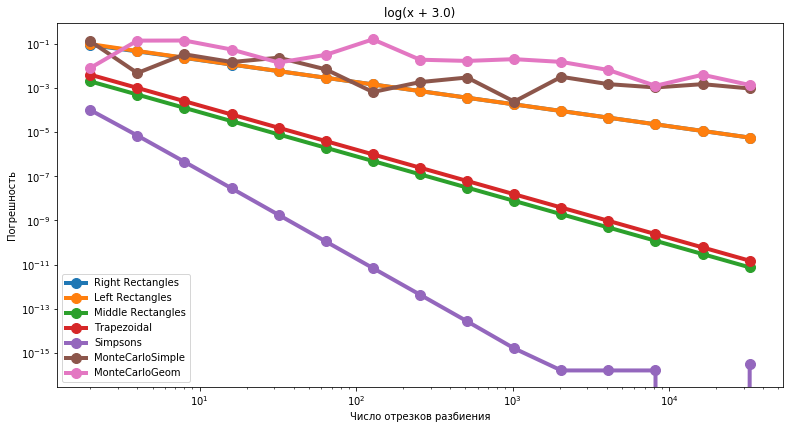

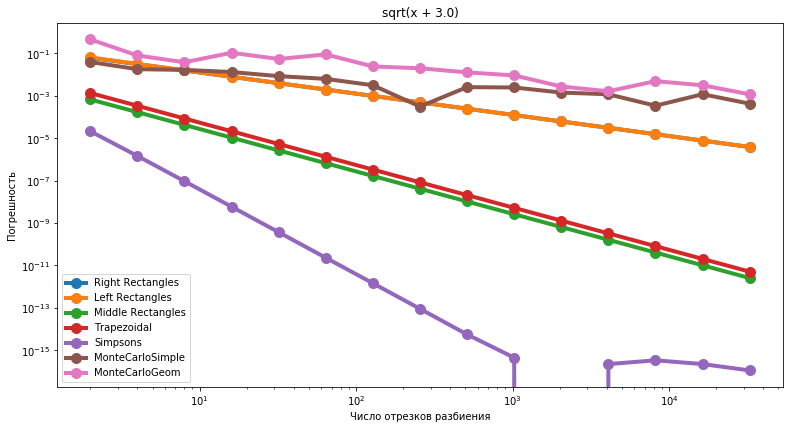

In [12]:
steps = [2**(n+1) for n in range(15)]
figureSizeConst = (13, 6.7)
for namefunc, func, ValueAnalytical in zip(functionsSym, LambdaFunc, ValueAnalyticalSym):
    plt.figure(figsize=figureSizeConst)
    plt.title(namefunc)
    for f in Func:
        f.SetFunction(func)
        errors = []
        for h in steps:
            f.SetNumBlocks(h)
            errors.append(abs((f(RIGHT) - ValueAnalytical)/ValueAnalytical))
        plt.loglog(steps, errors, '-o', linewidth=4, markersize=10, label=f.GetMethod())
        plt.legend(loc='best')
    plt.xlabel('Число отрезков разбиения')
    plt.ylabel('Погрешность')
    plt.show()

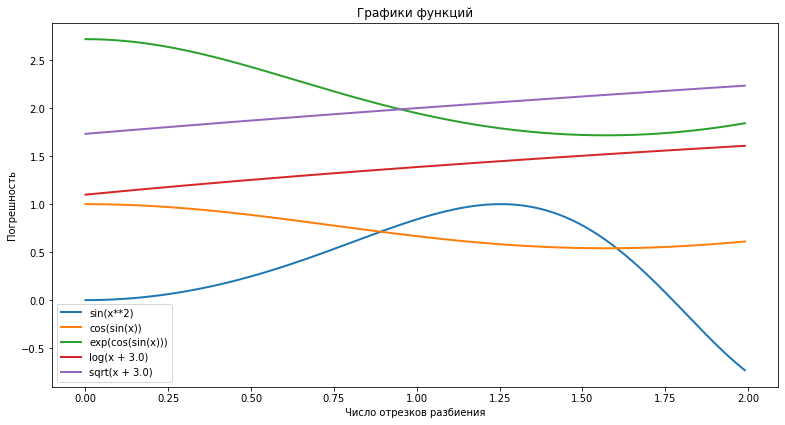

In [13]:
figureSizeConst = (13, 6.7)
plt.figure(figsize=figureSizeConst)
for namefunc, func in zip(functionsSym, LambdaFunc):
    plt.title('Графики функций')
    values = []
    border = np.arange(0, 2, 0.01)
    for i in border:
        values.append(func(i))
    plt.plot(border, values, linewidth=2, label=namefunc)
    plt.legend(loc='best')
    plt.xlabel('Число отрезков разбиения')
    plt.ylabel('Погрешность')
plt.show()